<a target="_blank" href="https://colab.research.google.com/github/zichaozeng/AI-2024_Multimodal_Large_Language_Model/blob/main/GPT_tutorial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



# **Multi-modal Large Language Model Tutorial**

_[Zichao Zeng](https://www.zengzichao.com/en/)_ – Multi-modal Large Language Model


*   An MLLM is an advanced neural network architecture designed to process and integrate multiple types of data modalities, such as text, images, audio, and video, enabling comprehensive understanding and reasoning across diverse input types.

*   MLLMs combine the strengths of language models (e.g., GPT) with visual or multimodal encoders (e.g., CLIP or Vision Transformers) to perform tasks that require both linguistic and visual understanding, such as captioning, visual question answering, and image-text retrieval.

*   These models are typically pre-trained on large-scale datasets containing aligned multimodal data, leveraging objectives like contrastive learning, masked prediction, or sequence modeling to learn cross-modal representations.

*   MLLMs are used in various domains, including augmented reality (AR), autonomous vehicles, healthcare, education, and creative industries, to provide richer insights and interactions by fusing information from different sources.

* They offer stronger generalisation, better contextual understanding, and finer-grained reasoning by leveraging complementary information from multiple modalities, surpassing the limitations of unimodal models.


## **Zero-Shot Building Age Classification from Facade Image Using GPT-4**



[![Static Badge](https://img.shields.io/badge/Home_Page-purple)](https://zichaozeng.github.io/ba_classifier) &nbsp;
[![Static Badge](https://img.shields.io/badge/ISPRS%20TC2-red?logo=Paper&label=Paper)](https://isprs-archives.copernicus.org/articles/XLVIII-2-2024/457/2024/isprs-archives-XLVIII-2-2024-457-2024.pdf) &nbsp;
[![Static Badge](https://img.shields.io/badge/Paper-arXiv-red)](https://arxiv.org/abs/2404.09921) &nbsp;
[![Static Badge](https://img.shields.io/badge/Dataset-FI_London-green)](https://rdr.ucl.ac.uk/articles/dataset/FI-London/25592799) &nbsp;
[![Static Badge](https://img.shields.io/badge/demo-Jupyter%20Notebook-blue)](https://github.com/3Dimaging-ucl/Building_Age_Classifier_with_FI-London/blob/main/BaC_demo.ipynb)


🔥 **Zero-shot Classifier**: Estimate buinding age from facade image without any training!  
🔥 **Facade Image Dataset**: FI-London combining facade images and building's attributs including builidng age and land use.  
⚠️ To test our classifier, the paid **OpenAI API Key** to call GPT-4 Vision is required.

### Preparation for Colab

Prepare necessary packages for OpenAI.

In [ ]:
# Install required packages
!pip install openai==1.55.3 httpx==0.27.2 --force-reinstall --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.24.0 requires anyio<4,>=3.1.0, but you have anyio 4.7.0 which is incompatible.


Get your OpenAI API key: https://openai.com/index/openai-api/

### Loading required packages

In [1]:
import base64
from openai import OpenAI
import json
import os
import io
from PIL import Image
import requests

### Loading tested image


Option 1: input the image from online

Load a test image which is a picture of UCL main building.

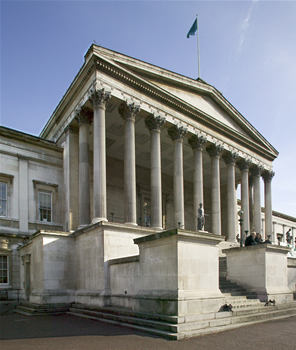

In [2]:
# You can input any image URL here
img_url = 'https://www.ucl.ac.uk/estates/space/photos/005.jpg'
# Load the image using pillow and requests from the URL
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# Display the image
raw_image

Encode the image

In [3]:
# Save the image to a buffer
buffer = io.BytesIO()
raw_image.save(buffer, format="JPEG")
buffer.seek(0)

# Convert the image to base64
# This is the format that OpenAI's API expects
base64_image = base64.b64encode(buffer.read()).decode('utf-8')

# Display the base64 image (it's just a string)
base64_image

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFeASgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwCqc7jyetAJ9TSkfMfrSgV7x54An1NOBPqaQCnAUDFBPqacC3qaTFOFIBQT6mnhj6mminAUDHgn1NPyfU/nTQKcKQDgT6n86XJ9TQKdikAgJ9TTgW9TQBTsUAJls9T+dKC3qaXFKBSAMn1NOBPqfzpMU4CgBwY+pp4Lep/OmAU

Option 2: input the image from local folder

Load a test image from [FI-London](https://rdr.ucl.ac.uk/articles/dataset/FI-London/25592799?file=45653850) dataset.

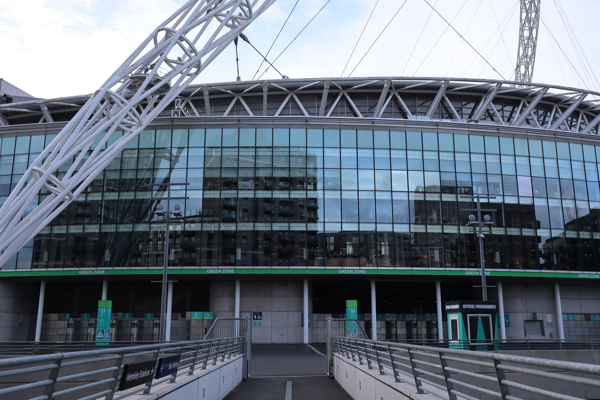

In [4]:
# You can input the image path here (we've provided some samples)
img_path = './FI-London/14.jpg'
# Load the image using pillow
raw_image = Image.open(img_path).convert('RGB')

# Display the image
raw_image.resize((600, 400))

In [ ]:
# Convert the image to base64
# This is the format that OpenAI's API expects
# We don't need to save the image to a buffer first, if it's already on disk

with open(img_path, 'rb') as img_file:
    base64_image = base64.b64encode(img_file.read()).decode('utf-8')

### Loading GPT-4 classifier

Get your OpenAI API key: https://openai.com/index/openai-api/

![api instruction 1](./API_instruction/api1.png)

![api instruction 2](./API_instruction/api2.png)

In [ ]:
# Replace 'your_own_api_key' with your OpenAI API key
openai_api_key = "your_own_api_key"

Design a prompt.

In [6]:
# Prompt for building age estimation
prompt = """
    Your task is to predict the age epoch of a building in London based on the image provided by users.

    You will be presented with <building>, an image containing a main building. You need to infer the most likely <building_age_epoch>.

    Only select <building_age_epoch> from this list: [">2020", "2000-2019", "1980-1999", "1960-1979", "1940-1959", "1920-1939", "1900-1919", "1880-1899", "1860-1879", "1840-1859", "1820-1839", "1800-1819", "1750-1799", "1700-1749", "<1700"].

    Organize your answer in the following format containing two keys:
    {
        "age": <building_age_epoch>,
        "reason": ""
    }

    The meaning of two keys:
    - "age": the most likely <building_age_epoch> chosen from the provided list.
    - "reason": a concise explanation supporting your prediction. Please do not use line breaks in the reason.
    """

In [ ]:
# # Try to design your own prompt for other tasks
# prompt = """
#     {task description}

#     Organize your answer in the following format containing two keys:
#     {
#         "Key 1": <any format you want>,
#         "Key 2": ""
#     }

#     The meaning of two keys:
#     - "Key 1": key 1 description.
#     - "Key 2": key 2 description.
#     """

Apply OpenAI API.

In [7]:
# Apply the gpt-4o model
# More information: https://platform.openai.com/docs/guides/vision
client = OpenAI(
    api_key = openai_api_key
)
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
        "role": "user",
        "content": [
            {
            "type": "text",
            "text": prompt,
            },
            {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}",
            },
            },
        ],
        }
    ],
    max_tokens=600,
)

In [ ]:
# Display the returned response
# There're too many information in the response
# We only need the message content which is Choice[0]
response

Get your result!

In [8]:
# Extract the prediction from the response
result = response.choices[0]

# Load the prediction as a JSON object (after deleting the markdown)
json_pred = json.loads(result.message.content.strip('```json\n').strip('```'))

In [9]:
# Display the prediction
print("Age:", json_pred["age"])
print("Reason:", json_pred["reason"])

Age: 1820-1839
Reason: The building features classical architectural elements such as grand columns and a pediment, common in Neoclassical architecture popular in the early 19th century.


### Reference


Zeng, Z., Goo, J.M., Wang, X., Chi, B., Wang, M. and Boehm, J., 2024. Zero-Shot Building Age Classification from Facade Image Using GPT-4. The International Archives of the Photogrammetry, Remote Sensing and Spatial Information Sciences, 48, pp.457-464.